In [1]:
%load_ext autoreload
%autoreload 2

### Train Model

/home/leon/programming/XAI-baselines/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [00:32<00:00,  3.09it/s]


Final metrics: 
Validation-Loss:  0.624
Validation-Accuracy:  71.0%
train-Loss:  0.545
train-Accuracy:  72.8%
# Parameters: 392
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=23, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=2, bias=True)
  )
)


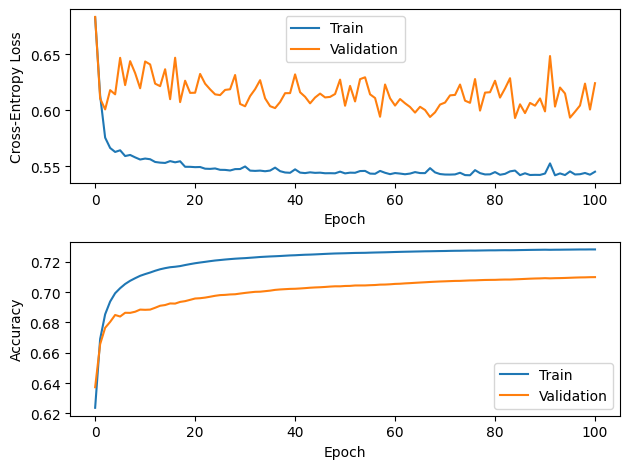

In [1]:
from network.training_heloc import train_model_and_visualize
import os
import torch

model = train_model_and_visualize(
    layers=[23,15,2],
    num_epochs=100,
    lr = 0.001,
    batch_size=32,
)
BASE_DIR = os.getenv('BASE_DIR')
torch.save(model, os.path.join(BASE_DIR, 'network', 'heloc_model.pth'))

In [2]:
import torch
import os
from evaluation import AttributionMethodsEvaluator

BASE_DIR = os.getenv('BASE_DIR')
model = torch.load(os.path.join(BASE_DIR, 'network', 'heloc_model.pth'))

evluator = AttributionMethodsEvaluator(model, "HELOC")

/home/leon/programming/XAI-baselines/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Zero Baseline

  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:01<00:00, 72.05it/s]


Mean: [0.77265151 0.39704627 0.24481047 0.23283593 0.18935427 0.17912035
 0.16635534 0.15627459 0.15483281 0.14882543 0.14929751 0.14967641
 0.15060048 0.15559107 0.16028159 0.17117471 0.18065189 0.1960643
 0.20969183 0.21107214 0.24346849 0.33995913 0.474408  ]


100%|██████████| 986/986 [00:03<00:00, 286.42it/s]


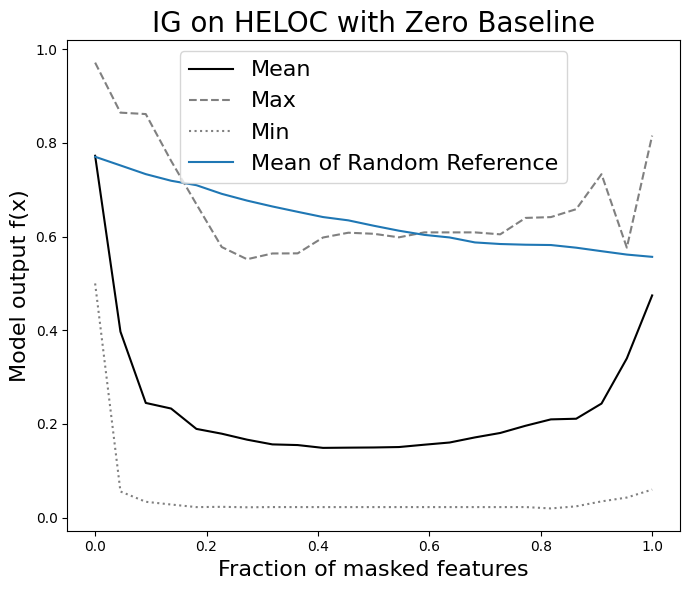

In [4]:
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from baselines import ZeroBaseline
from data import HELOC

baseline_generator = ZeroBaseline(model)

ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Zero Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False
)

### Zero Uniform Output Baseline

Prediction of zero baseline: [[0.82193214 0.17806791]])


  0%|          | 0/300 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:12<00:00, 23.74it/s]


initial_baseline: tensor([0.0074, 0.0059, 0.0062, 0.0061, 0.0096, 0.0080, 0.0077, 0.0085, 0.0088,
        0.0081, 0.0053, 0.0073, 0.0068, 0.0088, 0.0078, 0.0062, 0.0067, 0.0085,
        0.0072, 0.0087, 0.0088, 0.0054, 0.0066])
autobaseline: tensor([ 0.0074,  0.0057,  0.0063,  0.0060,  0.0095,  0.0080,  0.0076,  0.0084,
         0.0087,  0.0082, -0.1441,  0.0072,  0.0070,  0.0086,  0.0080,  0.0060,
         0.0066, -0.0320,  0.0072, -0.0483,  0.0089, -0.0539,  0.0067],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5024, 0.4976])


  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
100%|██████████| 100/100 [00:01<00:00, 78.11it/s]


Mean: [0.77265151 0.42577006 0.28536788 0.21114943 0.16369081 0.12241601
 0.10558674 0.09029339 0.0811959  0.07615885 0.07501679 0.07343086
 0.07266805 0.07022393 0.0713752  0.0740374  0.07398524 0.08254183
 0.08962171 0.073379   0.08246111 0.13648305 0.29174476]


100%|██████████| 986/986 [00:03<00:00, 323.62it/s]


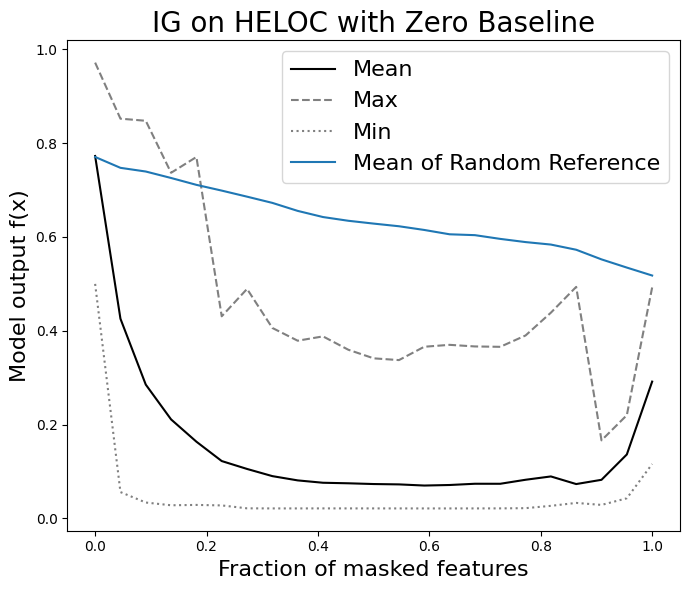

In [22]:
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from data import HELOC
import torch
from baselines import ZeroUniformOutputBaseline, set_precomputed_zero_uniform_output_baseline, get_precomputed_zero_uniform_ouput_baseline

print(f"Prediction of zero baseline: {model.predict(torch.zeros(1, 23)).detach().numpy()})")
#set_precomputed_zero_uniform_output_baseline(model)
baseline_generator = get_precomputed_zero_uniform_ouput_baseline()

data = HELOC(mode="test")

ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Zero Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False
)

### Furthest Uniform Output Baseline

tensor([0.9322, 0.3890, 0.1522, 0.5391, 0.2692, 0.0000, 0.0000, 1.0000, 0.0110,
        0.7778, 1.0000, 0.2115, 0.0000, 0.0000, 0.0312, 0.0000, 0.0000, 0.0821,
        0.0000, 0.3529, 0.0000, 0.3333, 0.5370])


  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:00<00:00, 107.07it/s]


Mean: [0.77265151 0.4213072  0.26967504 0.20317722 0.1657437  0.14768586
 0.13843668 0.13270815 0.12907883 0.1283219  0.12781426 0.12843433
 0.12806813 0.12834207 0.12972673 0.1333967  0.13768415 0.14484149
 0.15837549 0.17629287 0.21156    0.25822848 0.33652803]


100%|██████████| 986/986 [00:02<00:00, 475.51it/s]


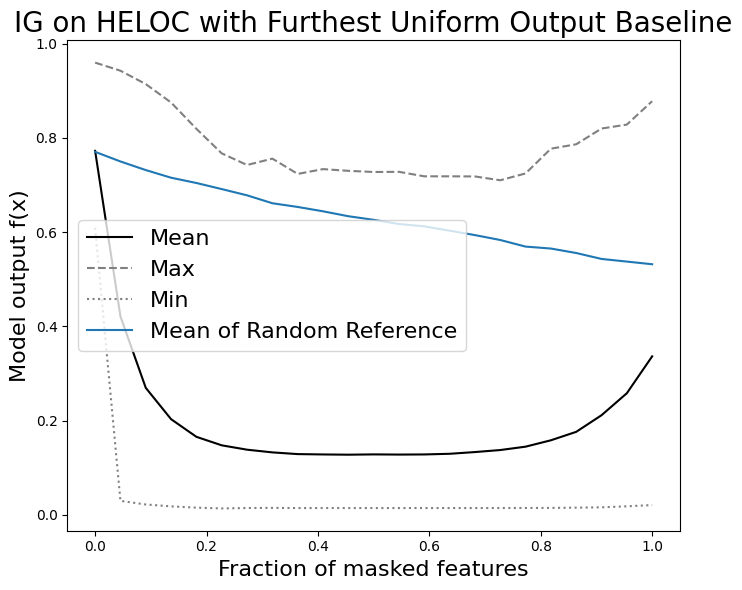

In [2]:
from baselines.precomputed import set_precomputed_furthest_uniform_output_baseline, get_precomputed_furthest_uniform_output_baseline
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from data import HELOC

test_data = HELOC(mode="test")
train_data = HELOC(mode="train")

#set_precomputed_furthest_uniform_output_baseline(dataset_test=test_data, dataset_train=train_data, classification_model=model, baseline_error_weight=0.6)
baseline_generator = get_precomputed_furthest_uniform_output_baseline()

ig = IntegratedGradient(model)

print(test_data[0][0])

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Furthest Uniform Output Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False,
    num_samples=100
)

### Nearest Uniform Output Baseline

  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:00<00:00, 114.17it/s]


Mean: [0.77265151 0.5569479  0.40648008 0.32087743 0.2739054  0.24579653
 0.22348303 0.21251185 0.20294926 0.19559382 0.19161205 0.1878405
 0.1852993  0.18489951 0.18336328 0.18665625 0.18837215 0.1926322
 0.19987078 0.21354072 0.23248512 0.26176466 0.32528553]


100%|██████████| 986/986 [00:02<00:00, 476.65it/s]


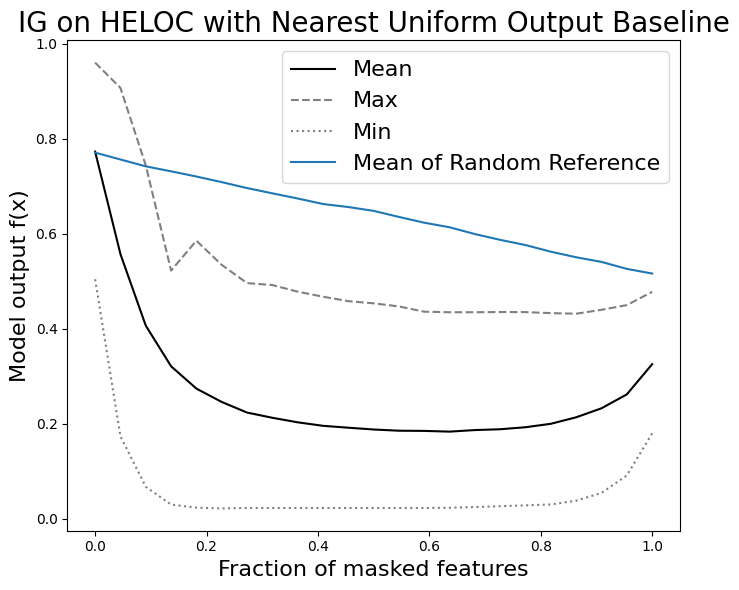

In [4]:
from baselines.precomputed import set_precomputed_nearest_uniform_output_baseline, get_precomputed_nearest_uniform_output_baseline
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from data import HELOC

test_data = HELOC(mode="test")
train_data = HELOC(mode="train")

#set_precomputed_nearest_uniform_output_baseline(dataset_test=test_data, dataset_train=train_data, classification_model=model, baseline_error_weight=0.6)
baseline_generator = get_precomputed_nearest_uniform_output_baseline()

ig = IntegratedGradient(model)


evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Nearest Uniform Output Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False,
    num_samples=100
)

### Mean Baseline

  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:00<00:00, 107.18it/s]


Mean: [0.77265151 0.63959211 0.53323432 0.45602236 0.40889599 0.382969
 0.36516427 0.35340864 0.34350136 0.33615783 0.33126297 0.32750993
 0.32512306 0.32334823 0.32427649 0.32720006 0.33156858 0.3376697
 0.34544869 0.35659584 0.37005981 0.39128896 0.43323213]


100%|██████████| 986/986 [00:02<00:00, 466.53it/s]


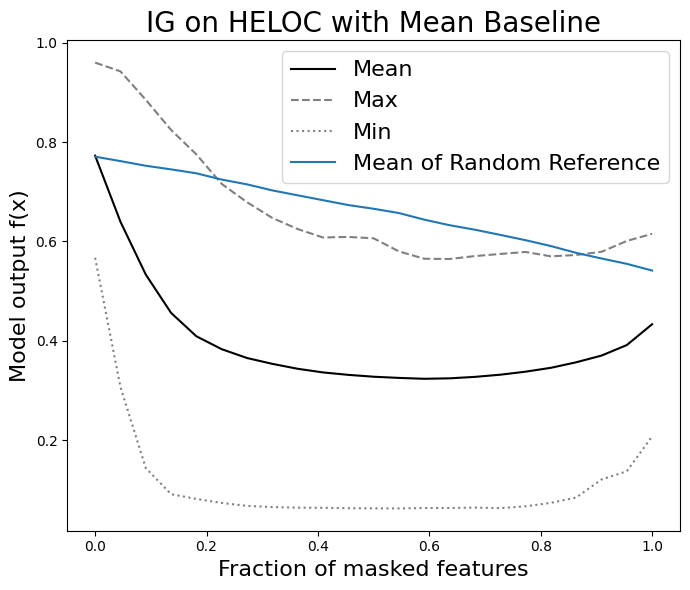

In [5]:
from baselines import MeanBaseline
from data import HELOC

data = HELOC(mode="validation")

mean_baseline_generator = MeanBaseline(data)
mean_baseline = mean_baseline_generator.get_baseline()

evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Mean Baseline",
    attribution_baseline=mean_baseline_generator,
    masking_baseline=mean_baseline_generator,
    apply_log=False
)

### Furthest Baseline

  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:01<00:00, 92.82it/s]


Mean: [0.77265151 0.44999411 0.30281548 0.23569843 0.20592842 0.19026065
 0.18152604 0.17899665 0.18167466 0.18186995 0.18149092 0.18317259
 0.18402349 0.18671422 0.18921863 0.19489312 0.20240046 0.21308059
 0.22835256 0.24986702 0.28441676 0.33171251 0.39331896]


100%|██████████| 986/986 [00:04<00:00, 219.54it/s]


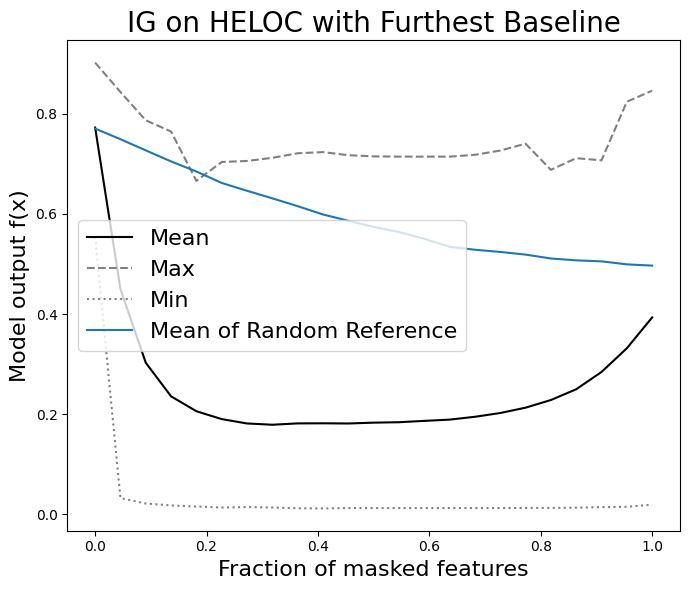

In [9]:
from baselines import FurthestBaseline
from data import HELOC

test_data = HELOC(mode="test")

baseline_generator = FurthestBaseline(test_data)
ig = IntegratedGradient(model)

evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Furthest Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False
)

### Nearest Baseline

  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:01<00:00, 73.94it/s]


Mean: [0.77265151 0.6985923  0.64850384 0.61354748 0.58912908 0.57150987
 0.56009997 0.5519167  0.54687172 0.54445902 0.54278713 0.54224651
 0.54224203 0.54233056 0.54291317 0.54420424 0.54708089 0.55234004
 0.56130031 0.57318648 0.59007743 0.61329025 0.64921808]


100%|██████████| 986/986 [00:03<00:00, 292.65it/s]


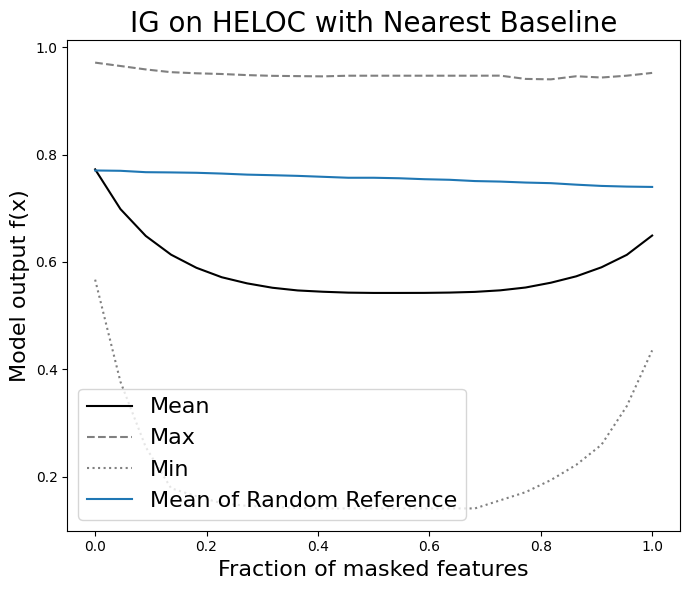

In [9]:
from baselines import NearestBaseline
from data import HELOC
from evaluation import AttributionMethodsEvaluator

test_data = HELOC(mode="test")

baseline_generator = NearestBaseline(test_data)
ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Nearest Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False
)

### Comparison if Baselines with IG

/home/leon/programming/XAI-baselines/evaluation/utils/visualisation.py:174: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  fig.suptitle(title, fontsize=20)
  0%|          | 0/300 [00:00<?, ?it/s]

/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:08<00:00, 37.01it/s]
/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


initial_baseline: tensor([0.0074, 0.0059, 0.0062, 0.0061, 0.0096, 0.0080, 0.0077, 0.0085, 0.0088,
        0.0081, 0.0053, 0.0073, 0.0068, 0.0088, 0.0078, 0.0062, 0.0067, 0.0085,
        0.0072, 0.0087, 0.0088, 0.0054, 0.0066])
autobaseline: tensor([ 0.0074,  0.0057,  0.0063,  0.0060,  0.0095,  0.0080,  0.0076,  0.0084,
         0.0087,  0.0082, -0.1441,  0.0072,  0.0070,  0.0086,  0.0080,  0.0060,
         0.0066, -0.0320,  0.0072, -0.0483,  0.0089, -0.0539,  0.0067],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5024, 0.4976])


  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:00<00:00, 127.86it/s]


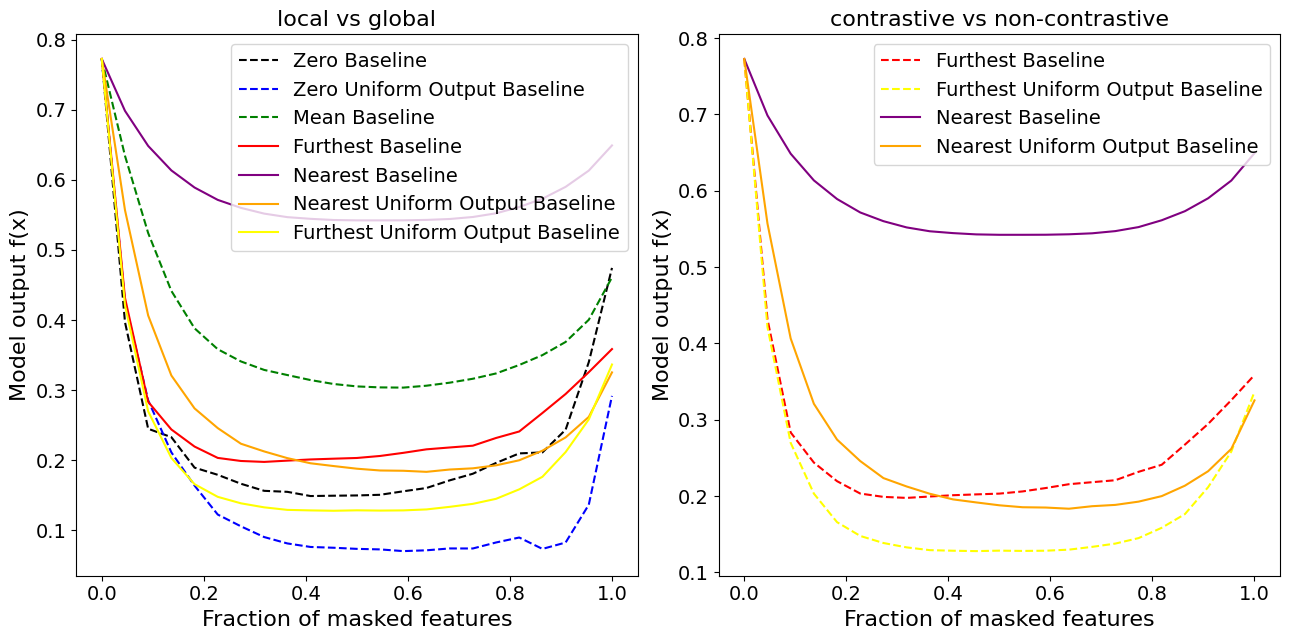

In [30]:
evaluator.visualize_log_odds_of_attribution_methods(ig.attribute, save_fig=True)

  0%|          | 0/300 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:07<00:00, 38.51it/s]
/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


initial_baseline: tensor([0.0074, 0.0059, 0.0062, 0.0061, 0.0096, 0.0080, 0.0077, 0.0085, 0.0088,
        0.0081, 0.0053, 0.0073, 0.0068, 0.0088, 0.0078, 0.0062, 0.0067, 0.0085,
        0.0072, 0.0087, 0.0088, 0.0054, 0.0066])
autobaseline: tensor([ 0.0074,  0.0057,  0.0063,  0.0060,  0.0095,  0.0080,  0.0076,  0.0084,
         0.0087,  0.0082, -0.1441,  0.0072,  0.0070,  0.0086,  0.0080,  0.0060,
         0.0066, -0.0320,  0.0072, -0.0483,  0.0089, -0.0539,  0.0067],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5024, 0.4976])


  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
/home/leon/programming/XAI-baselines/network/m

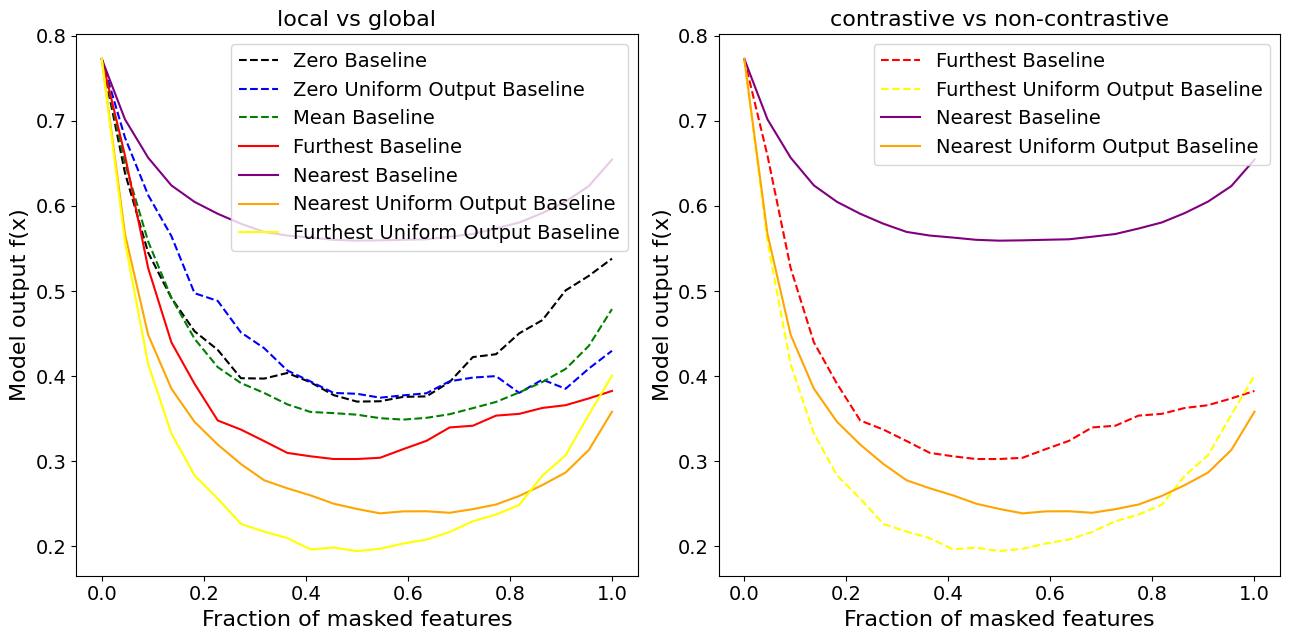

In [31]:
from attribution import BShap

bshap = BShap(model)
evaluator.visualize_log_odds_of_attribution_methods(bshap.attribute,save_fig=True)

  0%|          | 0/300 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:07<00:00, 40.28it/s]
/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


initial_baseline: tensor([0.0074, 0.0059, 0.0062, 0.0061, 0.0096, 0.0080, 0.0077, 0.0085, 0.0088,
        0.0081, 0.0053, 0.0073, 0.0068, 0.0088, 0.0078, 0.0062, 0.0067, 0.0085,
        0.0072, 0.0087, 0.0088, 0.0054, 0.0066])
autobaseline: tensor([ 0.0074,  0.0057,  0.0063,  0.0060,  0.0095,  0.0080,  0.0076,  0.0084,
         0.0087,  0.0082, -0.1441,  0.0072,  0.0070,  0.0086,  0.0080,  0.0060,
         0.0066, -0.0320,  0.0072, -0.0483,  0.0089, -0.0539,  0.0067],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5024, 0.4976])


  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
/home/leon/programming/XAI-baselines/network/m

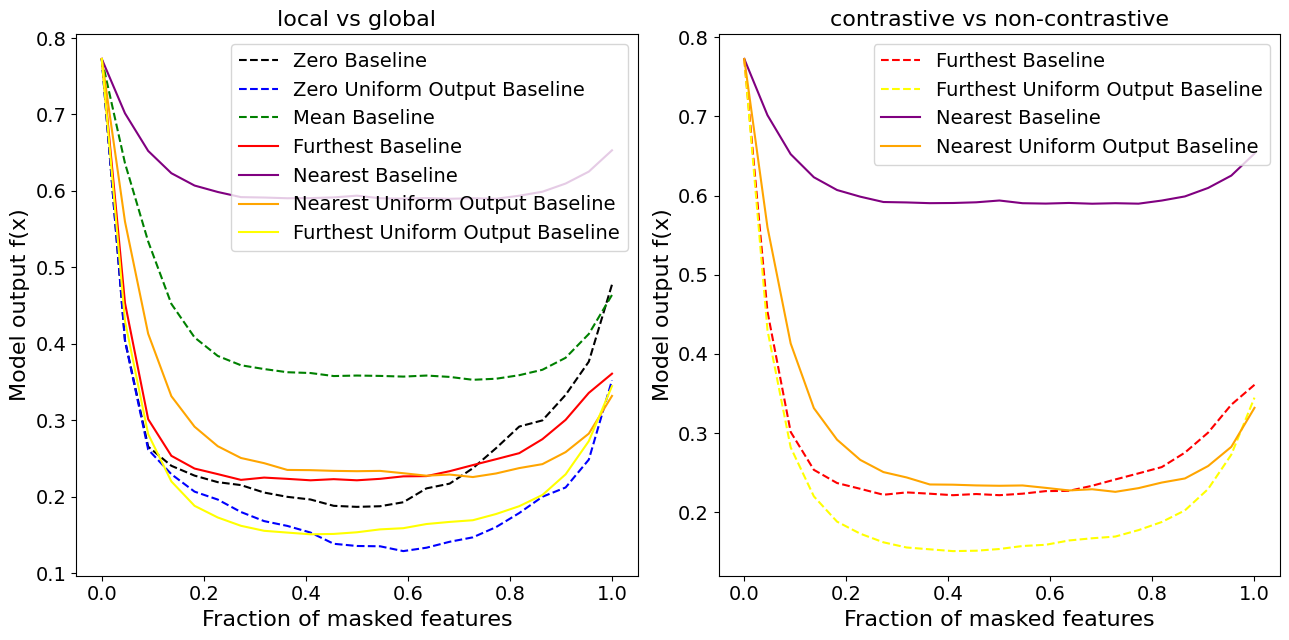

In [32]:
from attribution import Lime

lime = Lime(model)
evaluator.visualize_log_odds_of_attribution_methods(lime.attribute, save_fig=True)

# Model Calibration

/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


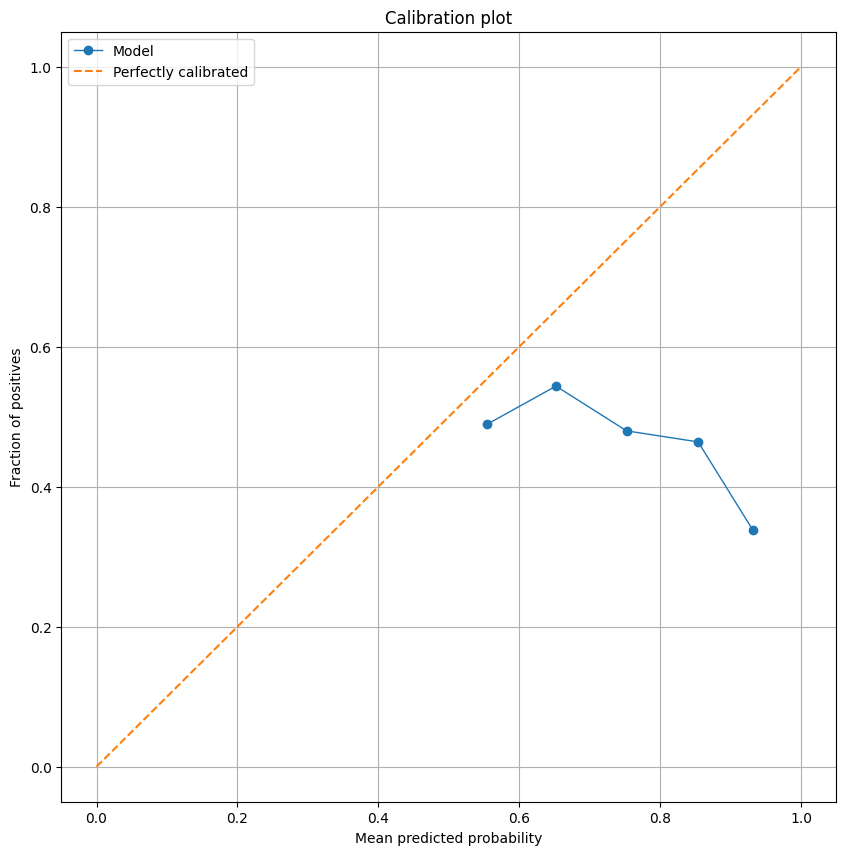

In [29]:
import torch
from torch.utils.data import DataLoader
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np
from data import HELOC


validation_data = HELOC(mode="validation")
true_labels = []
predicted_probs = []

with torch.no_grad():
    for i in range(len(validation_data)):
        inputs, labels = validation_data[i]
        prediction = model.predict(inputs).max()
        true_labels.append(labels.argmax().item())
        predicted_probs.append(prediction.item())



prob_true, prob_pred = calibration_curve(true_labels, predicted_probs, n_bins=10)


plt.figure(figsize=(10, 10))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.title('Calibration plot')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.grid()
plt.show()


  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:00<00:00, 126.64it/s]


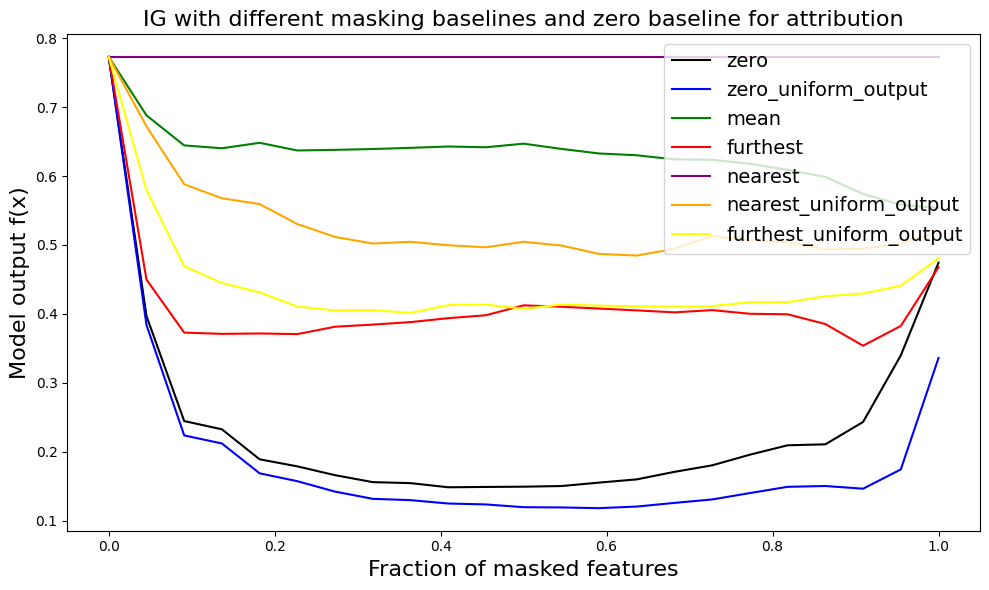

In [7]:
evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_logs_odds_with_different_masking_baselines(
    attribute=ig.attribute,
    attribution_baseline_str="zero",
    title="IG with different masking baselines and zero baseline for attribution",
    apply_log=False,
    save_fig=True
)

  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:00<00:00, 118.21it/s]


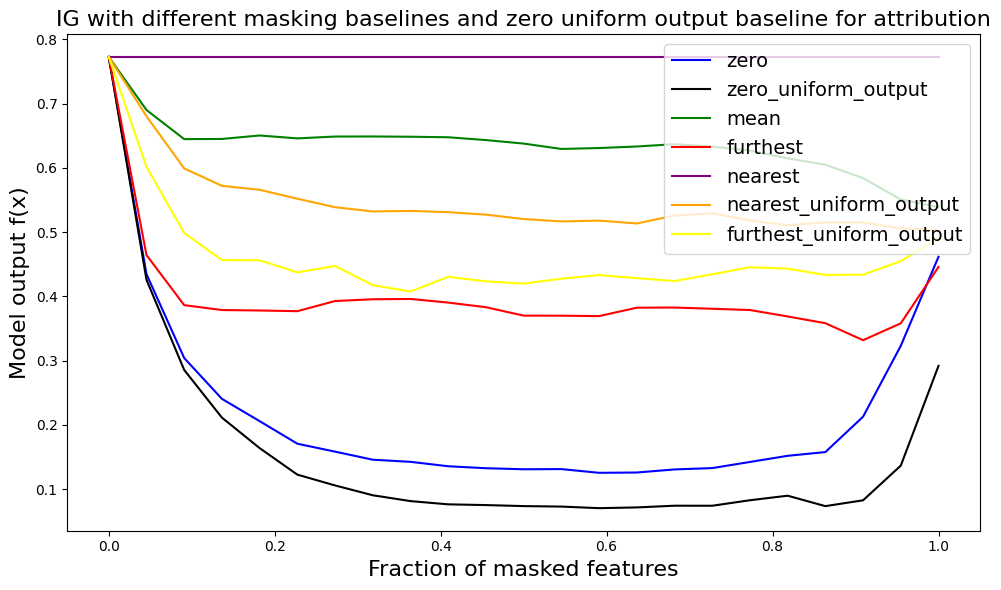

In [9]:
evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_logs_odds_with_different_masking_baselines(
    attribute=ig.attribute,
    attribution_baseline_str="zero_uniform_output",
    title="IG with different masking baselines and zero uniform output baseline for attribution",
    apply_log=False,
    save_fig=True
)

  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:00<00:00, 139.02it/s]


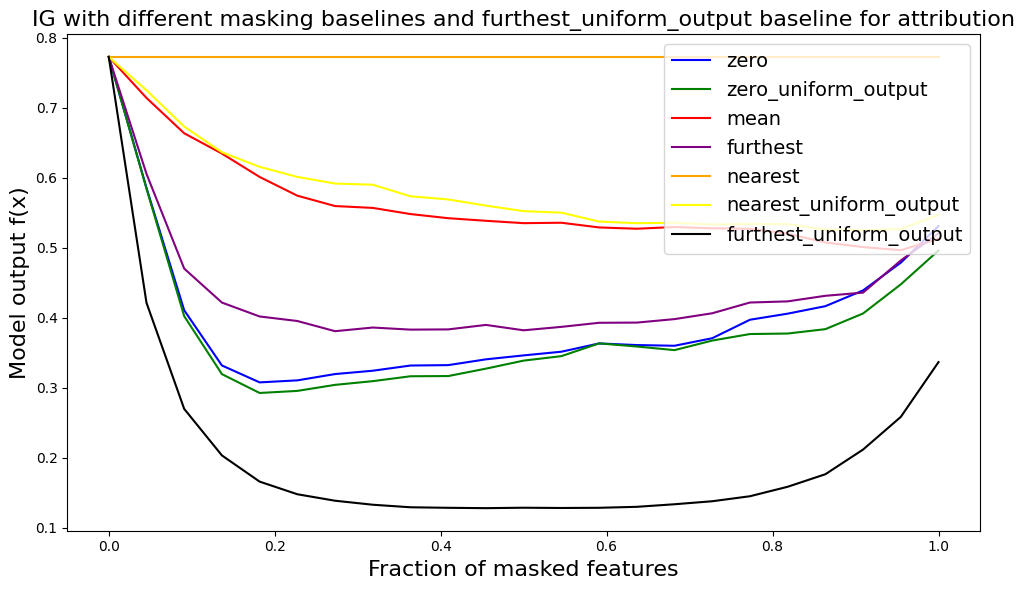

In [10]:
evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_logs_odds_with_different_masking_baselines(
    attribute=ig.attribute,
    attribution_baseline_str="furthest_uniform_output",
    title="IG with different masking baselines and furthest_uniform_output baseline for attribution",
    apply_log=False,
    save_fig=True
)

  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 100/100 [00:00<00:00, 133.03it/s]


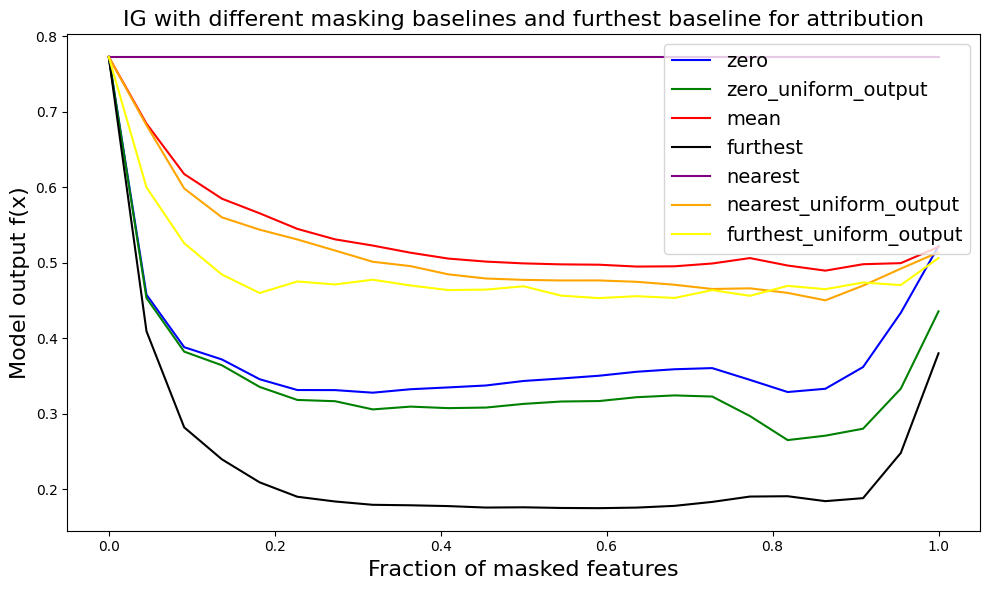

In [11]:
evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_logs_odds_with_different_masking_baselines(
    attribute=ig.attribute,
    attribution_baseline_str="furthest",
    title="IG with different masking baselines and furthest baseline for attribution",
    apply_log=False,
    save_fig=True
)

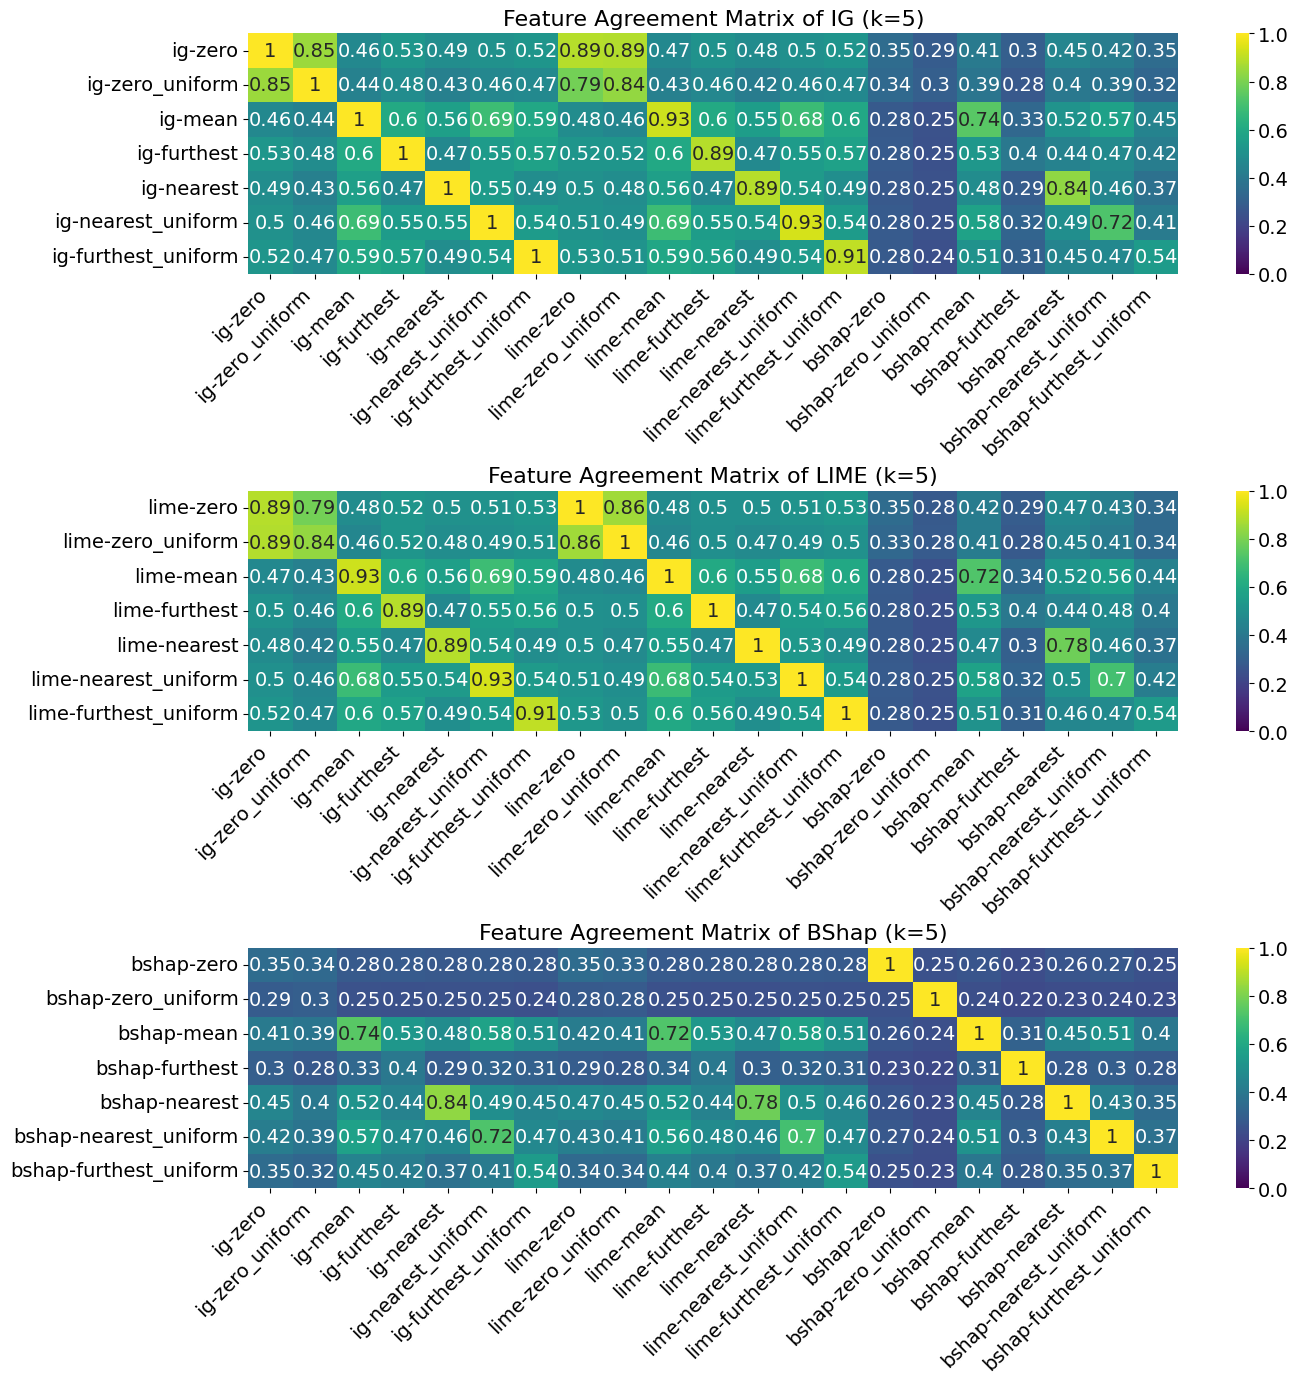

In [41]:
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")

evaluator.visualize_precomputed_feature_agreement_matrices(
    k=5,
    save_fig=True
)